# Capstone Project - The Battle of the Neighborhoods
## Opening an Ice Cream Business in Seattle, Washington, USA

## Table of contents
* [Introduction: Background/Business Problem](#Introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)

## Introduction <a name="Introduction"></a>

**Background:**

Seattle is located on the west coast of the United States. It is considered the largest city in the state of Washington alongside being the largest city in the Pacific Northwest region of North America. Seattle has been the birthplace of many Tech giants such as Microsoft, Amazon to name a few. Seattle being a tech hub and one of the fastest growing major cities in the United States. All of this tempted me to explore a possibility of opening an Ice-Cream business in this city.



**Business Problem:**

The audience for this analysis is any business owner trying to figure out **where to open an Ice-Cream shop/shops or ice-cream trucks** given they want to be situated in a **populous area and an area/areas where the general population is young and outdoorsy**, in the city of Seattle, Washington, USA.

## Data <a name="Data"></a>

Based on the business problem discussed earlier, factors that will be affecting recommendations are:

* A populous area
* Young and Outdoorsy Inhabitants 



**Neighbourhood Data:** Neighbourhood Data for Seattle, Washington was imported from US CENSUS. This data is obtained from seattle.gov (US census) website [2]. This data set includes data on population, housing, and ethnicity information for each neighbourhood. Total number of neighbourhoods provided were 53. The data was presented in a CSV format, since the dataset was not too big, I chose to remove unwanted headers, footers and columns within the CSV using Excel. Later high-level data cleaning was carried out in Python.

*source:* https://www.seattle.gov/opcd/population-and-demographics/about-seattle#censusdata

**Location Data:** The location data is provided by Foursquare API. The Foursquare API was used to gather the data regarding most common venues for each respective neighbourhood using the explore function of the Foursquare API. This is discussed in more detail later in the Methodology Section.  

**Coordinates Data:** The coordinates data for each respective neighbourhood was obtained using geopy and geocoder packages. 

## Methodology <a name="Methodology"></a>

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
census_df = pd.read_csv('Seattle Project Data Census.csv')
census_df.head()

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units
0,City of Seattle Total,608660,422870,48316,4809,84215,2351,205082,515147,93513,44035,308516,283510,25006
1,Arbor Heights,6030,5082,98,43,326,33,1140,4869,1161,342,2752,2612,140
2,Fauntleroy/Seaview,13723,11777,349,89,625,29,2303,11352,2371,649,6920,6513,407
3,West Seattle Junction/Genesee Hill,17713,15299,342,122,855,46,2910,14511,3202,768,8889,8372,517
4,Alki/Admiral,10542,9240,188,73,554,6,1585,9034,1508,374,6068,5528,540


Drop the unwanted first row.

In [3]:
census_df = census_df.drop(0, axis=0)
census_df.head()

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units
1,Arbor Heights,6030,5082,98,43,326,33,1140,4869,1161,342,2752,2612,140
2,Fauntleroy/Seaview,13723,11777,349,89,625,29,2303,11352,2371,649,6920,6513,407
3,West Seattle Junction/Genesee Hill,17713,15299,342,122,855,46,2910,14511,3202,768,8889,8372,517
4,Alki/Admiral,10542,9240,188,73,554,6,1585,9034,1508,374,6068,5528,540
5,North Delridge,4787,3529,318,52,402,30,1493,4104,683,334,2618,2403,215


In [4]:
#check to see that the datatypes are the correct ones
census_df.dtypes

Neighbourhood                         object
Total Population                       int64
White                                  int64
Black or African American              int64
American Indian & Alaska Native        int64
Asian                                  int64
Native Hawaiian & Pacific Islander     int64
Persons of Color*                      int64
Population 18 and Over                 int64
Population Under 18                    int64
Persons of Color Under 18              int64
Housing Units                          int64
Occupied Housing Units                 int64
Vacant Housing Units                   int64
dtype: object

In [5]:
census_df.columns

Index(['Neighbourhood', 'Total Population', 'White',
       'Black or African American', 'American Indian & Alaska Native', 'Asian',
       'Native Hawaiian & Pacific Islander', 'Persons of Color*',
       'Population 18 and Over', 'Population Under 18',
       'Persons of Color Under 18', 'Housing Units', 'Occupied Housing Units',
       'Vacant Housing Units'],
      dtype='object')

In [6]:
#checking for general statistics
census_df[['Population 18 and Over', 'Population Under 18',
       'Persons of Color Under 18', 'Housing Units', 'Occupied Housing Units',
       'Vacant Housing Units']].describe()

,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,9719.754717,1764.396226,830.849057,5821.056604,5349.245283,471.811321
std,5553.287792,1092.719408,750.303949,3563.294470,3266.467493,389.317799
min,1124.000000,101.000000,43.000000,675.000000,619.000000,56.000000
25%,4891.000000,898.000000,345.000000,3166.000000,2980.000000,236.000000
50%,9243.000000,1810.000000,642.000000,5542.000000,5144.000000,381.000000
75%,12248.000000,2371.000000,986.000000,7126.000000,6671.000000,527.000000
max,31835.000000,4227.000000,3707.000000,21160.000000,19359.000000,1981.000000


In [7]:
census_df.columns

Index(['Neighbourhood', 'Total Population', 'White',
       'Black or African American', 'American Indian & Alaska Native', 'Asian',
       'Native Hawaiian & Pacific Islander', 'Persons of Color*',
       'Population 18 and Over', 'Population Under 18',
       'Persons of Color Under 18', 'Housing Units', 'Occupied Housing Units',
       'Vacant Housing Units'],
      dtype='object')

In [8]:
print('The dataframe has {} neighbourhoods.'.format(
        (census_df.shape[0])))

The dataframe has 53 neighbourhoods.


**Importing Libraries**

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geocoder --yes

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#% matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


### Adding Latitude and Longitude to the Neighbourhoods

In [10]:
from geopy.geocoders import Nominatim
import geocoder # to get coordinates

In [11]:
# function to get coordinates
def get_coords(neighbourhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Seattle, Washington'.format(neighbourhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [12]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_coords(neighbourhood) for neighbourhood in census_df["Neighbourhood"].tolist()]

In [13]:
#check if the coordinates were loaded successfully
coords

[[47.50861000000003, -122.37592999999998],
 [47.54665278807391, -122.38318559712893],
 [47.56503951993571, -122.37615434475542],
 [47.578940000000046, -122.41066999999998],
 [47.564730000000054, -122.36385999999999],
 [47.54704000000004, -122.36893999999995],
 [47.542860000000076, -122.35185999999999],
 [47.52648000000005, -122.37177999999994],
 [47.529870000000074, -122.35168999999996],
 [47.52722000000006, -122.31444999999997],
 [47.547510000000045, -122.32148999999998],
 [47.543625089230936, -122.34416368505906],
 [47.53304000000003, -122.28996999999998],
 [47.57686000000007, -122.31270999999998],
 [47.57074000000006, -122.30784999999997],
 [47.512350000000026, -122.26276999999999],
 [47.55687000000006, -122.28451999999999],
 [47.551150000000064, -122.26679999999999],
 [47.57827000000003, -122.28781999999995],
 [47.61293000000006, -122.28967999999998],
 [47.59427000000005, -122.30400999999995],
 [47.60357000000005, -122.32944999999995],
 [47.60878000000008, -122.32642999999996],
 [4

In [14]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
census_df['Latitude'] = df_coords['Latitude']
census_df['Longitude'] = df_coords['Longitude']

# check the neighborhoods and the coordinates
print(census_df.shape)
census_df.head()

(53, 16)


,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
1,Arbor Heights,6030,5082,98,43,326,33,1140,4869,1161,342,2752,2612,140,47.546653,-122.383186
2,Fauntleroy/Seaview,13723,11777,349,89,625,29,2303,11352,2371,649,6920,6513,407,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,17713,15299,342,122,855,46,2910,14511,3202,768,8889,8372,517,47.578940,-122.410670
4,Alki/Admiral,10542,9240,188,73,554,6,1585,9034,1508,374,6068,5528,540,47.564730,-122.363860
5,North Delridge,4787,3529,318,52,402,30,1493,4104,683,334,2618,2403,215,47.547040,-122.368940


### Further Data Cleaning

In [15]:
#Check for non-available/missing data in the dataframe
print("Num of neighbourhoods with missing Longitude: ", census_df.Longitude.isna().sum())

Num of neighbourhoods with missing Longitude:  1


In [16]:
#Identifying which entries have the non-available/missing data
census_df[census_df.isnull().any(axis=1)]

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
53,Pioneer Square/International District,5333,1718,902,88,2247,20,3744,4879,454,427,3398,3173,225,NaN,NaN


In [17]:
#Pioneer Square/International District has missing coordinates hence using the source below the coordinates will be changed
# correct coordinates for "Pioneer Square/International District": https://geohack.toolforge.org/geohack.php?pagename=Pioneer_Square,_Seattle&params=47_36_06_N_122_19_55_W_dim:500_region:US-WA

census_df.loc[53,'Latitude'] = 47.601667
census_df.loc[53,'Longitude'] = -122.331944
print("Num of neighbourhoods with missing Longitude: ", census_df.Longitude.isna().sum())

Num of neighbourhoods with missing Longitude:  0


### Mapping the Neighbourhoods to check for any Misplaced Datapoints

In [18]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


In [19]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(census_df['Latitude'], census_df['Longitude'], census_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [20]:
#locate outlier(s)/misplaced data points in neighbourhood data
census_df[census_df['Neighbourhood'].str.contains("North Capitol Hill")] 

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
25,North Capitol Hill,4157,3655,46,21,243,4,621,3716,441,91,2520,2294,226,47.65342,-122.56253


In [21]:
#North Capitol Hill has wrong coordinates hence using the source below the coordinates will be changed
# correct coordinates for "North Capitol Hill": https://nextdoor.com/neighborhood/nchnastl--seattle--wa/

census_df.loc[25,'Latitude'] = 47.63932
census_df.loc[25,'Longitude'] = -122.32036

#locate outlier(s) in neighbourhood data
census_df[census_df['Neighbourhood'].str.contains("North Capitol Hill")] 

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
25,North Capitol Hill,4157,3655,46,21,243,4,621,3716,441,91,2520,2294,226,47.63932,-122.32036


Check to see if the misplaced data point has been fixed or not.

In [22]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng, label in zip(census_df['Latitude'], census_df['Longitude'], census_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

If one zooms out there is another misplaced neighbourhood called "Belltown."

In [23]:
#locate outlier(s) in neighbourhood data
census_df[census_df['Neighbourhood'].str.contains("Bell")] 

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
51,Belltown,8601,6157,631,120,1147,33,2757,8425,176,80,6913,5932,981,38.89981,-77.02321


In [24]:
#Belltown has wrong coordinates hence using the source below the coordinates will be changed
# correct coordinates for "Belltown": https://geohack.toolforge.org/geohack.php?pagename=Belltown,_Seattle&params=47.61322_N_122.3465_W_region:US_type:city

census_df.loc[51,'Latitude'] = 47.61322
census_df.loc[51,'Longitude'] = -122.3465
#Check if the problem has been fixed
census_df[census_df['Neighbourhood'].str.contains("Belltown")] 

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Persons of Color*,Population 18 and Over,Population Under 18,Persons of Color Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
51,Belltown,8601,6157,631,120,1147,33,2757,8425,176,80,6913,5932,981,47.61322,-122.3465


### Final/Cleaned "census_df"

In [25]:
census_df = census_df.drop(['Persons of Color*','Persons of Color Under 18'], axis=1)
census_df.head()

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Population 18 and Over,Population Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
1,Arbor Heights,6030,5082,98,43,326,33,4869,1161,2752,2612,140,47.546653,-122.383186
2,Fauntleroy/Seaview,13723,11777,349,89,625,29,11352,2371,6920,6513,407,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,17713,15299,342,122,855,46,14511,3202,8889,8372,517,47.578940,-122.410670
4,Alki/Admiral,10542,9240,188,73,554,6,9034,1508,6068,5528,540,47.564730,-122.363860
5,North Delridge,4787,3529,318,52,402,30,4104,683,2618,2403,215,47.547040,-122.368940


### Final/Cleaned Seattle Neighbourhoods Map

In [26]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(census_df['Latitude'], census_df['Longitude'], census_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Segmentation of Census Dataframe into the following Dataframes:

#### Creating a Population by Age (Young and Old) DataFrame

In [27]:
pop_18_df = census_df[['Neighbourhood','Population 18 and Over','Population Under 18','Latitude','Longitude']]
pop_18_df.head()

,Neighbourhood,Population 18 and Over,Population Under 18,Latitude,Longitude
1,Arbor Heights,4869,1161,47.546653,-122.383186
2,Fauntleroy/Seaview,11352,2371,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,14511,3202,47.578940,-122.410670
4,Alki/Admiral,9034,1508,47.564730,-122.363860
5,North Delridge,4104,683,47.547040,-122.368940


#### Creating a Race/Ethnicity DataFrame

In [28]:
race_df = census_df[['Neighbourhood', 'White',
       'Black or African American', 'American Indian & Alaska Native', 'Asian',
       'Native Hawaiian & Pacific Islander','Latitude','Longitude']]
race_df.head()

,Neighbourhood,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Latitude,Longitude
1,Arbor Heights,5082,98,43,326,33,47.546653,-122.383186
2,Fauntleroy/Seaview,11777,349,89,625,29,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,15299,342,122,855,46,47.578940,-122.410670
4,Alki/Admiral,9240,188,73,554,6,47.564730,-122.363860
5,North Delridge,3529,318,52,402,30,47.547040,-122.368940


#### Creating a Housing DataFrame

In [29]:
housing_df = census_df[['Neighbourhood' ,'Housing Units', 'Occupied Housing Units',
       'Vacant Housing Units','Latitude','Longitude']]
housing_df.head()

,Neighbourhood,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
1,Arbor Heights,2752,2612,140,47.546653,-122.383186
2,Fauntleroy/Seaview,6920,6513,407,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,8889,8372,517,47.578940,-122.410670
4,Alki/Admiral,6068,5528,540,47.564730,-122.363860
5,North Delridge,2618,2403,215,47.547040,-122.368940


### Analysis: Demographics and Census Data Analysis of the Neighbourhoods

#### Population Analysis Dataframe:

##### 10 Most Populous Neighbourhoods

In [30]:
Most_Pop_neigh = census_df[['Neighbourhood','Total Population','Latitude','Longitude']].sort_values(['Total Population'], ascending=False).head(10)

Most_Pop_neigh

,Neighbourhood,Total Population,Latitude,Longitude
50,Queen Anne,35458,47.61576,-122.34464
30,Ravenna/Bryant,24187,47.68033,-122.27290
38,Greenwood/Phinney Ridge,23948,47.68508,-122.33232
24,Capitol Hill,19078,47.62396,-122.31882
29,University District,19051,47.67393,-122.29914
3,West Seattle Junction/Genesee Hill,17713,47.57894,-122.41067
22,Central Area/Squire Park,16969,47.60878,-122.32643
17,Columbia City,16883,47.55115,-122.26680
46,Wallingford,16014,47.64708,-122.32477
45,Fremont,15626,47.65555,-122.32650


In [31]:
# create map of 10 Neighbourhoods with the most Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Most_Pop_neigh['Latitude'], Most_Pop_neigh['Longitude'], Most_Pop_neigh['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

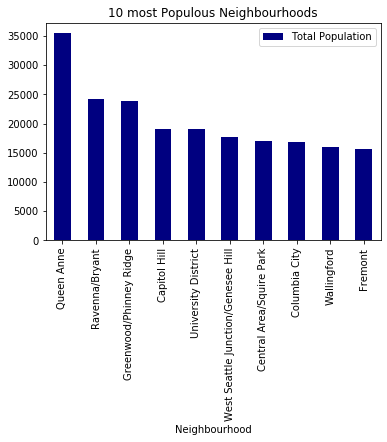

In [32]:
Most_Pop_neigh.plot.bar(x="Neighbourhood", y="Total Population", rot=90, title="10 most Populous Neighbourhoods", color="navy");

##### 10 Least Populous Neighbourhoods

In [33]:
Least_Pop_neigh = census_df[['Neighbourhood','Total Population','Latitude','Longitude']].sort_values(['Total Population'], ascending=True).head(10)

Least_Pop_neigh

,Neighbourhood,Total Population,Latitude,Longitude
11,Georgetown,1287,47.543625,-122.344164
12,Duwamish/SODO,2354,47.533040,-122.289970
21,Judkins Park,2925,47.603570,-122.329450
10,South Park,3873,47.547510,-122.321490
52,Downtown Commercial Core,4070,47.595820,-122.324740
25,North Capitol Hill,4157,47.639320,-122.320360
7,Riverview,4596,47.526480,-122.371780
5,North Delridge,4787,47.547040,-122.368940
27,Madison Park,4962,47.646900,-122.320280
53,Pioneer Square/International District,5333,47.601667,-122.331944


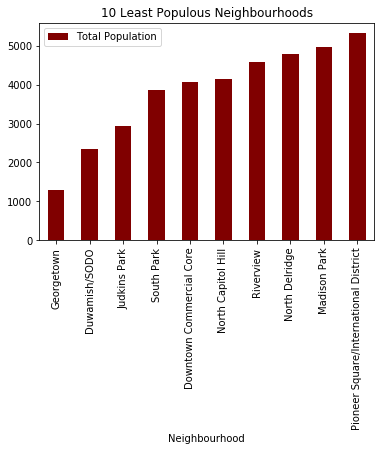

In [34]:
Least_Pop_neigh.plot.bar(x="Neighbourhood", y="Total Population", rot=90, title="10 Least Populous Neighbourhoods", color="maroon");

In [35]:
# create map of 10 Neighbourhoods with the Least Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Least_Pop_neigh['Latitude'], Least_Pop_neigh['Longitude'], Least_Pop_neigh['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

#### Population (Young and Old) DataFrame Analysis

In [36]:
pop_18_df.head()

,Neighbourhood,Population 18 and Over,Population Under 18,Latitude,Longitude
1,Arbor Heights,4869,1161,47.546653,-122.383186
2,Fauntleroy/Seaview,11352,2371,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,14511,3202,47.578940,-122.410670
4,Alki/Admiral,9034,1508,47.564730,-122.363860
5,North Delridge,4104,683,47.547040,-122.368940


##### 10 Neighbourhoods with most Population Under 18 in Seattle

In [37]:
top10_neigh_Pop18Under = pop_18_df[['Neighbourhood','Population Under 18','Latitude','Longitude']].sort_values(['Population Under 18'], ascending=False).head(10)

top10_neigh_Pop18Under

,Neighbourhood,Population Under 18,Latitude,Longitude
30,Ravenna/Bryant,4227,47.68033,-122.27290
13,South Beacon Hill/NewHolly,3892,47.57686,-122.31271
38,Greenwood/Phinney Ridge,3870,47.68508,-122.33232
17,Columbia City,3692,47.55115,-122.26680
50,Queen Anne,3623,47.61576,-122.34464
16,Rainier Beach,3389,47.55687,-122.28452
3,West Seattle Junction/Genesee Hill,3202,47.57894,-122.41067
31,Wedgwood/View Ridge,3179,47.66398,-122.27582
48,Magnolia,2655,47.65399,-122.37969
32,Laurelhurst/Sand Point,2645,47.70013,-122.31765


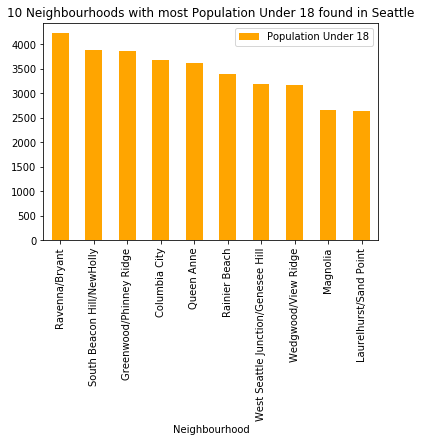

In [38]:
top10_neigh_Pop18Under.plot.bar(x="Neighbourhood", y="Population Under 18", rot=90, title="10 Neighbourhoods with most Population Under 18 found in Seattle", color="orange");

In [39]:
# create map of 10 Neighbourhoods with most Population Under 18 found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_neigh_Pop18Under['Latitude'], top10_neigh_Pop18Under['Longitude'], top10_neigh_Pop18Under['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Neighbourhoods with most Population 18 and Over in Seattle

In [40]:
top10_neigh_Pop18Plus = pop_18_df[['Neighbourhood','Population 18 and Over','Latitude','Longitude']].sort_values(['Population 18 and Over'], ascending=False).head(10)

top10_neigh_Pop18Plus

,Neighbourhood,Population 18 and Over,Latitude,Longitude
50,Queen Anne,31835,47.61576,-122.34464
38,Greenwood/Phinney Ridge,20078,47.68508,-122.33232
30,Ravenna/Bryant,19960,47.68033,-122.27290
29,University District,18445,47.67393,-122.29914
24,Capitol Hill,18397,47.62396,-122.31882
22,Central Area/Squire Park,14623,47.60878,-122.32643
3,West Seattle Junction/Genesee Hill,14511,47.57894,-122.41067
23,First Hill,14357,47.62396,-122.31882
46,Wallingford,14193,47.64708,-122.32477
45,Fremont,14016,47.65555,-122.32650


In [41]:
# create map of 10 Neighbourhoods with most Population 18 and Over  found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_neigh_Pop18Plus['Latitude'], top10_neigh_Pop18Plus['Longitude'], top10_neigh_Pop18Plus['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

#### Race per Neighbourhood DataFrame Analysis

In [42]:
race_df.head()

,Neighbourhood,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Latitude,Longitude
1,Arbor Heights,5082,98,43,326,33,47.546653,-122.383186
2,Fauntleroy/Seaview,11777,349,89,625,29,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,15299,342,122,855,46,47.578940,-122.410670
4,Alki/Admiral,9240,188,73,554,6,47.564730,-122.363860
5,North Delridge,3529,318,52,402,30,47.547040,-122.368940


##### 10 Most White Neighbourhoods in Seattle

In [43]:
top10_neigh_Whites = race_df[['Neighbourhood','White','Latitude','Longitude']].sort_values(['White'], ascending=False).head(10)

top10_neigh_Whites

,Neighbourhood,White,Latitude,Longitude
50,Queen Anne,30014,47.61576,-122.34464
38,Greenwood/Phinney Ridge,20051,47.68508,-122.33232
30,Ravenna/Bryant,19394,47.68033,-122.27290
3,West Seattle Junction/Genesee Hill,15299,47.57894,-122.41067
24,Capitol Hill,14636,47.62396,-122.31882
45,Fremont,13293,47.65555,-122.32650
29,University District,12527,47.67393,-122.29914
43,Sunset Hill/Loyal Heights,12466,47.66867,-122.38453
46,Wallingford,12239,47.64708,-122.32477
31,Wedgwood/View Ridge,12112,47.66398,-122.27582


In [44]:
# create map of 10 Neighbourhoods with most White Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_neigh_Whites['Latitude'], top10_neigh_Whites['Longitude'], top10_neigh_Whites['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Most Black Neighbourhoods in Seattle

In [45]:
top10_neigh_Blacks = race_df[['Neighbourhood','Black or African American','Latitude','Longitude']].sort_values(['Black or African American'], ascending=False).head(10)

top10_neigh_Blacks

,Neighbourhood,Black or African American,Latitude,Longitude
16,Rainier Beach,4630,47.55687,-122.28452
17,Columbia City,4521,47.55115,-122.26680
13,South Beacon Hill/NewHolly,4073,47.57686,-122.31271
22,Central Area/Squire Park,3668,47.60878,-122.32643
6,High Point,2319,47.54286,-122.35186
23,First Hill,2245,47.62396,-122.31882
20,Madrona/Leschi,2069,47.59427,-122.30401
15,North Beacon Hill/Jefferson Park,1735,47.51235,-122.26277
18,Seward Park,1510,47.57827,-122.28782
35,Cedar Park/Meadowbrook,1151,47.71868,-122.35030


In [46]:
# create map of 10 Neighbourhoods with most Black or African American Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_neigh_Blacks['Latitude'], top10_neigh_Blacks['Longitude'], top10_neigh_Blacks['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Most American Indian & Alaska Native Neighbourhoods in Seattle

In [47]:
top10_neigh_AIndian = race_df[['Neighbourhood','American Indian & Alaska Native','Latitude','Longitude']].sort_values(['American Indian & Alaska Native'], ascending=False).head(10)

top10_neigh_AIndian

,Neighbourhood,American Indian & Alaska Native,Latitude,Longitude
23,First Hill,252,47.62396,-122.318820
50,Queen Anne,209,47.61576,-122.344640
8,Roxhill/Westwood,205,47.52987,-122.351690
38,Greenwood/Phinney Ridge,191,47.68508,-122.332320
24,Capitol Hill,169,47.62396,-122.318820
47,Cascade/Eastlake,161,47.63348,-122.387026
33,Northgate/Maple Leaf,147,47.71030,-122.307200
34,Olympic Hills/Victory Heights,141,47.70841,-122.295860
35,Cedar Park/Meadowbrook,135,47.71868,-122.350300
15,North Beacon Hill/Jefferson Park,130,47.51235,-122.262770


In [48]:
# create map of 10 Neighbourhoods with most American Indian & Alaska Native Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(top10_neigh_AIndian['Latitude'], top10_neigh_AIndian['Longitude'], top10_neigh_AIndian['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Most Asian Neighbourhoods in Seattle

In [49]:
top10_neigh_Asian = race_df[['Neighbourhood','Asian','Latitude','Longitude']].sort_values(['Asian'], ascending=False).head(10)

top10_neigh_Asian

,Neighbourhood,Asian,Latitude,Longitude
13,South Beacon Hill/NewHolly,7296,47.57686,-122.31271
14,Beacon Hill,5087,47.57074,-122.30785
15,North Beacon Hill/Jefferson Park,5066,47.51235,-122.26277
17,Columbia City,4948,47.55115,-122.26680
29,University District,4446,47.67393,-122.29914
16,Rainier Beach,4325,47.55687,-122.28452
30,Ravenna/Bryant,2586,47.68033,-122.27290
50,Queen Anne,2409,47.61576,-122.34464
34,Olympic Hills/Victory Heights,2346,47.70841,-122.29586
46,Wallingford,2286,47.64708,-122.32477


In [50]:
# create map of 10 Neighbourhoods with most Asian Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_neigh_Asian['Latitude'], top10_neigh_Asian['Longitude'], top10_neigh_Asian['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Most Native Hawaiian & Pacific Islander Neighbourhoods in Seattle

In [51]:
top10_neigh_Hawai = race_df[['Neighbourhood','Native Hawaiian & Pacific Islander','Latitude','Longitude']].sort_values(['Native Hawaiian & Pacific Islander','Latitude'], ascending=False).head(10)

top10_neigh_Hawai

,Neighbourhood,Native Hawaiian & Pacific Islander,Latitude,Longitude
16,Rainier Beach,172,47.55687,-122.28452
17,Columbia City,152,47.55115,-122.26680
6,High Point,119,47.54286,-122.35186
13,South Beacon Hill/NewHolly,102,47.57686,-122.31271
8,Roxhill/Westwood,98,47.52987,-122.35169
9,Highland Park,93,47.52722,-122.31445
33,Northgate/Maple Leaf,83,47.71030,-122.30720
23,First Hill,83,47.62396,-122.31882
7,Riverview,74,47.52648,-122.37178
14,Beacon Hill,69,47.57074,-122.30785


In [52]:
# create map of 10 Neighbourhoods with most Native Hawaiian & Pacific Islander Population found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(top10_neigh_Hawai['Latitude'], top10_neigh_Hawai['Longitude'], top10_neigh_Hawai['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

#### Housing Per Neighbourhood DataFrame Analysis

In [53]:
housing_df.head()

,Neighbourhood,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
1,Arbor Heights,2752,2612,140,47.546653,-122.383186
2,Fauntleroy/Seaview,6920,6513,407,47.565040,-122.376154
3,West Seattle Junction/Genesee Hill,8889,8372,517,47.578940,-122.410670
4,Alki/Admiral,6068,5528,540,47.564730,-122.363860
5,North Delridge,2618,2403,215,47.547040,-122.368940


##### 10 Neighbourhoods with most Housing Units in Seattle

In [54]:
top10_most_housing_units = housing_df[['Neighbourhood','Housing Units','Latitude','Longitude']].sort_values(['Housing Units'], ascending=False).head(10)

top10_most_housing_units

,Neighbourhood,Housing Units,Latitude,Longitude
50,Queen Anne,21160,47.61576,-122.344640
24,Capitol Hill,14333,47.62396,-122.318820
38,Greenwood/Phinney Ridge,11664,47.68508,-122.332320
47,Cascade/Eastlake,10834,47.63348,-122.387026
30,Ravenna/Bryant,10777,47.68033,-122.272900
23,First Hill,9159,47.62396,-122.318820
3,West Seattle Junction/Genesee Hill,8889,47.57894,-122.410670
22,Central Area/Squire Park,8879,47.60878,-122.326430
45,Fremont,8819,47.65555,-122.326500
46,Wallingford,7930,47.64708,-122.324770


In [55]:
# create map of 10 Neighbourhoods with most Housing Units found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_most_housing_units['Latitude'], top10_most_housing_units['Longitude'], top10_most_housing_units['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Neighbourhoods with most Occupied Housing Units in Seattle

In [56]:
top10_occupied_unit_neigh = housing_df[['Neighbourhood','Occupied Housing Units','Latitude','Longitude']].sort_values(['Occupied Housing Units'], ascending=False).head(10)

top10_occupied_unit_neigh

,Neighbourhood,Occupied Housing Units,Latitude,Longitude
50,Queen Anne,19359,47.61576,-122.344640
24,Capitol Hill,13177,47.62396,-122.318820
38,Greenwood/Phinney Ridge,11085,47.68508,-122.332320
30,Ravenna/Bryant,10177,47.68033,-122.272900
47,Cascade/Eastlake,8853,47.63348,-122.387026
3,West Seattle Junction/Genesee Hill,8372,47.57894,-122.410670
45,Fremont,8292,47.65555,-122.326500
22,Central Area/Squire Park,8216,47.60878,-122.326430
23,First Hill,7628,47.62396,-122.318820
46,Wallingford,7425,47.64708,-122.324770


In [57]:
# create map of 10 Neighbourhoods with most Occupied Housing Units found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top10_occupied_unit_neigh['Latitude'], top10_occupied_unit_neigh['Longitude'], top10_occupied_unit_neigh['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

##### 10 Neighbourhoods with most Vacant Housing Units in Seattle

In [58]:
top10_vacant_unit_neigh = housing_df[['Neighbourhood','Vacant Housing Units','Latitude','Longitude']].sort_values(['Vacant Housing Units'], ascending=False).head(10)

top10_vacant_unit_neigh

,Neighbourhood,Vacant Housing Units,Latitude,Longitude
47,Cascade/Eastlake,1981,47.63348,-122.387026
50,Queen Anne,1801,47.61576,-122.344640
23,First Hill,1531,47.62396,-122.318820
24,Capitol Hill,1156,47.62396,-122.318820
51,Belltown,981,47.61322,-122.346500
36,Broadview/Bitter Lake,774,47.69914,-122.339680
33,Northgate/Maple Leaf,733,47.71030,-122.307200
44,Ballard,677,47.66137,-122.356080
22,Central Area/Squire Park,663,47.60878,-122.326430
30,Ravenna/Bryant,600,47.68033,-122.272900


In [59]:
# create map of 10 Neighbourhoods with most Vacant Housing Units found in Seattle
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(top10_vacant_unit_neigh['Latitude'], top10_vacant_unit_neigh['Longitude'], top10_vacant_unit_neigh['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Venue Analysis: Foursquare
To explore the venues near the respective Neighbourhoods, we will use Foursquare API.

We're interested in venues within 500 meters radius of the neighbourhoods.

In [ ]:
#CLIENT_ID = ****** # your Foursquare ID
#CLIENT_SECRET = ****** # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [61]:
# Function to get venues near Seattle

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [62]:
census_df.head(2)

,Neighbourhood,Total Population,White,Black or African American,American Indian & Alaska Native,Asian,Native Hawaiian & Pacific Islander,Population 18 and Over,Population Under 18,Housing Units,Occupied Housing Units,Vacant Housing Units,Latitude,Longitude
1,Arbor Heights,6030,5082,98,43,326,33,4869,1161,2752,2612,140,47.546653,-122.383186
2,Fauntleroy/Seaview,13723,11777,349,89,625,29,11352,2371,6920,6513,407,47.565040,-122.376154


In [63]:
# list the venues in a DataFrame
seattle_venues = getNearbyVenues(names=census_df['Neighbourhood'],
                                   latitudes=census_df['Latitude'],
                                   longitudes=census_df['Longitude']
                                  )

Arbor Heights
Fauntleroy/Seaview
West Seattle Junction/Genesee Hill
Alki/Admiral
North Delridge
High Point
Riverview
Roxhill/Westwood
Highland Park
South Park
Georgetown
Duwamish/SODO
South Beacon Hill/NewHolly
Beacon Hill
North Beacon Hill/Jefferson Park
Rainier Beach
Columbia City
Seward Park
Mt. Baker/North Rainier
Madrona/Leschi
Judkins Park
Central Area/Squire Park
First Hill
Capitol Hill
North Capitol Hill
Miller Park
Madison Park
Montlake/Portage Bay
University District
Ravenna/Bryant
Wedgwood/View Ridge
Laurelhurst/Sand Point
Northgate/Maple Leaf
Olympic Hills/Victory Heights
Cedar Park/Meadowbrook
Broadview/Bitter Lake
Licton Springs
Greenwood/Phinney Ridge
Green Lake
Haller Lake
North Beach/Blue Ridge
Whittier Heights
Sunset Hill/Loyal Heights
Ballard
Fremont
Wallingford
Cascade/Eastlake
Magnolia
Interbay
Queen Anne
Belltown
Downtown Commercial Core
Pioneer Square/International District


In [64]:
#Check the size of the resulting dataframe
print(seattle_venues.shape)
seattle_venues.head()

(1426, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arbor Heights,47.546653,-122.383186,Beveridge Place Pub,47.545380,-122.387385,Pub
1,Arbor Heights,47.546653,-122.383186,The New Bridge,47.546570,-122.387371,Pub
2,Arbor Heights,47.546653,-122.383186,Thriftway,47.544537,-122.386412,Grocery Store
3,Arbor Heights,47.546653,-122.383186,Whiskey West,47.545124,-122.387549,Whisky Bar
4,Arbor Heights,47.546653,-122.383186,Pet Elements,47.544600,-122.387438,Pet Store


Finding the number of venues returned for each respective neighbourhood

In [65]:
#Let's check how many venues were returned for each neighbourhood
seattle_venues[["Venue","Neighbourhood"]].groupby('Neighbourhood').count()

,Venue
Neighbourhood,
Alki/Admiral,13
Arbor Heights,21
Ballard,15
Beacon Hill,11
Belltown,100
Broadview/Bitter Lake,26
Capitol Hill,51
Cascade/Eastlake,7
Cedar Park/Meadowbrook,25


Finding neighbourhoods with 10 most venues

In [66]:
#Let's check how many neighbourhoods have the most venues
df_10mostvenues_neighs = seattle_venues[["Venue","Neighbourhood"]].groupby('Neighbourhood').count().sort_values('Venue', ascending=False).head(10).reset_index()
df_10mostvenues_neighs

,Neighbourhood,Venue
0,Montlake/Portage Bay,100
1,Pioneer Square/International District,100
2,Belltown,100
3,Judkins Park,94
4,Sunset Hill/Loyal Heights,86
5,Queen Anne,84
6,Central Area/Squire Park,55
7,South Park,54
8,Capitol Hill,51
9,First Hill,51


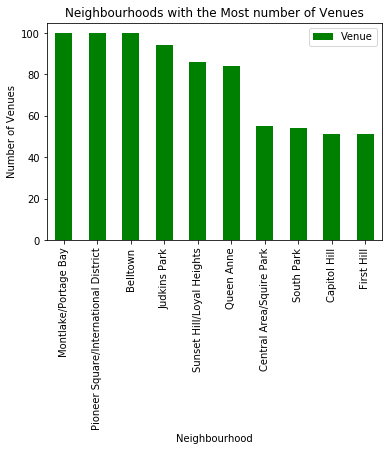

In [67]:
# Bar graph of 10 neighbourhoods with the most venues
df_10mostvenues_neighs.plot.bar(x="Neighbourhood", y="Venue", rot=90, title="Neighbourhoods with the Most number of Venues", color="green");
plt.ylabel('Number of Venues');

In [68]:
#census_df[census_df['Neighbourhood'].str.contains("Capi")] 

In [69]:
#Create a dataframe for mapping that has 10 neighbourhoods with the most number of venues displayed on a map
df_10mostvenues_neighs_map= census_df.loc[[53,51,28,21,43,50,10,22,23,24],["Neighbourhood","Latitude", "Longitude"]]
df_10mostvenues_neighs_map

,Neighbourhood,Latitude,Longitude
53,Pioneer Square/International District,47.601667,-122.331944
51,Belltown,47.613220,-122.346500
28,Montlake/Portage Bay,47.661270,-122.313070
21,Judkins Park,47.603570,-122.329450
43,Sunset Hill/Loyal Heights,47.668670,-122.384530
50,Queen Anne,47.615760,-122.344640
10,South Park,47.547510,-122.321490
22,Central Area/Squire Park,47.608780,-122.326430
23,First Hill,47.623960,-122.318820
24,Capitol Hill,47.623960,-122.318820


In [70]:
# create map of 10 Neighbourhoods with most number of Venues
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_10mostvenues_neighs_map['Latitude'], df_10mostvenues_neighs_map['Longitude'], df_10mostvenues_neighs_map['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='Navy',
        fill=True,
        fill_color='Gold',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

In [71]:
#Let's check how many neighbourhoods have the least number of venues
df_10leastvenues_neighs = seattle_venues[["Venue","Neighbourhood"]].groupby('Neighbourhood').count().sort_values('Venue', ascending=True).head(10).reset_index()
df_10leastvenues_neighs

,Neighbourhood,Venue
0,Columbia City,2
1,Duwamish/SODO,2
2,Laurelhurst/Sand Point,3
3,Georgetown,3
4,North Beacon Hill/Jefferson Park,3
5,Ravenna/Bryant,3
6,High Point,3
7,North Delridge,4
8,Seward Park,4
9,Riverview,4


In [72]:
#census_df[census_df['Neighbourhood'].str.contains("Ri")] 

In [73]:
#Create a dataframe for mapping that has 10 neighbourhoods with the least number of venues displayed on a map
df_10leastvenues_neighs_map= census_df.loc[[12,30,17,32,15,11,40,5,18,7],["Neighbourhood","Latitude", "Longitude"]]
df_10leastvenues_neighs_map

,Neighbourhood,Latitude,Longitude
12,Duwamish/SODO,47.533040,-122.289970
30,Ravenna/Bryant,47.680330,-122.272900
17,Columbia City,47.551150,-122.266800
32,Laurelhurst/Sand Point,47.700130,-122.317650
15,North Beacon Hill/Jefferson Park,47.512350,-122.262770
11,Georgetown,47.543625,-122.344164
40,Haller Lake,47.700440,-122.384180
5,North Delridge,47.547040,-122.368940
18,Seward Park,47.578270,-122.287820
7,Riverview,47.526480,-122.371780


In [74]:
# create map of Top 10 Neighbourhoods with the least number of Venues
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_10leastvenues_neighs_map['Latitude'], df_10leastvenues_neighs_map['Longitude'], df_10leastvenues_neighs_map['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='Navy',
        fill=True,
        fill_color='Red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

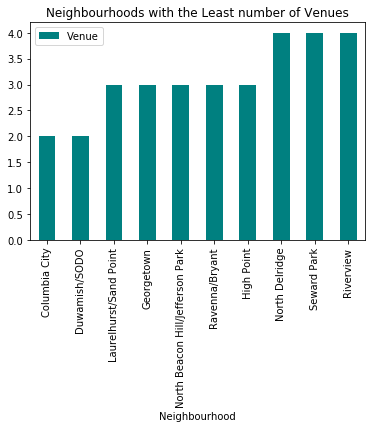

In [75]:
# Bar graph of 10 neighbourhoods with the least venues
df_10leastvenues_neighs.plot.bar(x="Neighbourhood", y="Venue", rot=90, title="Neighbourhoods with the Least number of Venues", color="teal");

Finding out how many venue categories exist and out of that how many are unique so that further analysis could be carried out.

In [76]:
#Let's find out how many unique venue categories can be curated from all the returned venues
print('There are {} unique venue categories.'.format(len(seattle_venues['Venue Category'].unique())))

There are 239 unique venue categories.


In [77]:
print('There are {} venue categories in total.'.format(len(seattle_venues['Venue Category'])))

There are 1426 venue categories in total.


In [78]:
#List of unique venue categories
seattle_venues['Venue Category'].unique()

array(['Pub', 'Grocery Store', 'Whisky Bar', 'Pet Store', 'Pizza Place',
       'Comfort Food Restaurant', 'Fried Chicken Joint',
       'Japanese Restaurant', 'Bank', 'Rental Car Location',
       'Coffee Shop', 'Chinese Restaurant', 'Supplement Shop',
       'Storage Facility', 'Gas Station', 'Sandwich Place',
       'Shipping Store', 'Asian Restaurant', 'Burger Joint', 'Gym',
       'Furniture / Home Store', 'Salon / Barbershop', 'Spa',
       'Public Art', 'Taco Place', 'Inn', 'BBQ Joint', 'Sports Bar',
       'Brewery', 'Golf Course', 'Track', 'Beach', 'Italian Restaurant',
       'Mexican Restaurant', 'Fish & Chips Shop', 'Neighborhood',
       'Ice Cream Shop', 'Seafood Restaurant', 'Donut Shop',
       'Vietnamese Restaurant', 'Park', 'Outdoor Sculpture',
       'Historic Site', 'Greek Restaurant', 'Thai Restaurant',
       'Art Gallery', 'Market', 'History Museum', 'Trail',
       'Miscellaneous Shop', 'Soccer Field', 'Bus Station', 'Skate Park',
       'Construction & Landsca

#### Analyzing Each Neighbourhood in Seattle

In [79]:
# one hot encoding
seattle_onehot = pd.get_dummies(seattle_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighbourhood'] = seattle_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot.head()

,Neighbourhood,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Candy Store,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comfort Food Restaurant,Community College,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Entertainment Service,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Inn,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lawyer,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Outdoor Sculpture,Park,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,Record Shop,Rental Car Location,Rental Service,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Track,Trail,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo Exhibit
0,Arbor Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arbor Heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [80]:
seattle_onehot.shape

(1426, 240)

#### Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each venue category

In [81]:
seattle_grouped = seattle_onehot.groupby('Neighbourhood').mean().reset_index()
seattle_grouped.head()

,Neighbourhood,ATM,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat Rental,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Candy Store,Caribbean Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Theater,Comedy Club,Comfort Food Restaurant,Community College,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Entertainment Service,Ethiopian Restaurant,Eye Doctor,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Inn,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lawyer,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Outdoor Sculpture,Park,Peking Duck Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Post Office,Print Shop,Pub,Public Art,Record Shop,Rental Car Location,Rental Service,Restaurant,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Skate Park,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tour Provider,Toy / Game Store,Track,Trail,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,Zoo Exhibit
0,Alki/Admiral,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.230769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.076923,0.0,0.0,0.000000,0.0,0.076923,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0

In [82]:
seattle_grouped.shape

(53, 240)

#### Let's print each Neighbourhood along with the 10 most common venues

In [83]:
num_top_venues = 10

for hood in seattle_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = seattle_grouped[seattle_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alki/Admiral----
                        venue  freq
0                        Park  0.23
1                 Bus Station  0.23
2                 Coffee Shop  0.08
3                  Skate Park  0.08
4  Construction & Landscaping  0.08
5                Soccer Field  0.08
6         Arts & Crafts Store  0.08
7                         Gym  0.08
8              Sandwich Place  0.08
9           Outdoor Sculpture  0.00


----Arbor Heights----
                     venue  freq
0              Pizza Place  0.14
1                      Pub  0.10
2           Sandwich Place  0.10
3          Supplement Shop  0.05
4                Pet Store  0.05
5            Grocery Store  0.05
6              Coffee Shop  0.05
7         Storage Facility  0.05
8  Comfort Food Restaurant  0.05
9                     Bank  0.05


----Ballard----
                venue  freq
0                Park  0.20
1         Coffee Shop  0.07
2   Convenience Store  0.07
3         Gas Station  0.07
4         Music Store  0.07
5      Gen

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [84]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 15 venues for each neighborhood.

In [85]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted_try = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted_try['Neighbourhood'] = seattle_grouped['Neighbourhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighbourhoods_venues_sorted_try.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted_try.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Alki/Admiral,Bus Station,Park,Arts & Crafts Store,Sandwich Place,Skate Park,Soccer Field,Construction & Landscaping,Coffee Shop,Gym,Falafel Restaurant,Zoo Exhibit,Farmers Market,Eye Doctor,Fast Food Restaurant,Filipino Restaurant
1,Arbor Heights,Pizza Place,Pub,Sandwich Place,Supplement Shop,Japanese Restaurant,Storage Facility,Fried Chicken Joint,Chinese Restaurant,Gas Station,Shipping Store,Pet Store,Coffee Shop,Bank,Comfort Food Restaurant,Grocery Store
2,Ballard,Park,Music Store,Volleyball Court,Gas Station,Coffee Shop,Grocery Store,Bus Stop,Spa,Mexican Restaurant,Convenience Store,Winery,Food,General Travel,Fish & Chips Shop,Fabric Shop
3,Beacon Hill,Park,Golf Course,Pub,Playground,Mexican Restaurant,Golf Driving Range,Skate Park,Coffee Shop,Trail,Dog Run,Doctor's Office,Flea Market,Fish Market,Fish & Chips Shop,Department Store
4,Belltown,Bar,Seafood Restaurant,Coffee Shop,Hotel,Gym,Breakfast Spot,Sushi Restaurant,Bakery,Italian Restaurant,Cocktail Bar,Pizza Place,American Restaurant,New American Restaurant,Marijuana Dispensary,Lounge


Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [86]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = seattle_grouped['Neighbourhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alki/Admiral,Bus Station,Park,Arts & Crafts Store,Sandwich Place,Skate Park,Soccer Field,Construction & Landscaping,Coffee Shop,Gym,Falafel Restaurant
1,Arbor Heights,Pizza Place,Pub,Sandwich Place,Supplement Shop,Japanese Restaurant,Storage Facility,Fried Chicken Joint,Chinese Restaurant,Gas Station,Shipping Store
2,Ballard,Park,Music Store,Volleyball Court,Gas Station,Coffee Shop,Grocery Store,Bus Stop,Spa,Mexican Restaurant,Convenience Store
3,Beacon Hill,Park,Golf Course,Pub,Playground,Mexican Restaurant,Golf Driving Range,Skate Park,Coffee Shop,Trail,Dog Run
4,Belltown,Bar,Seafood Restaurant,Coffee Shop,Hotel,Gym,Breakfast Spot,Sushi Restaurant,Bakery,Italian Restaurant,Cocktail Bar


### K means Clustering: Neighbourhood Clustering

In [87]:
from sklearn import metrics
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [88]:
seattle_grouped_clustering = seattle_grouped.drop('Neighbourhood', 1)

#### Finding the Optimum K Method #1: Elbow Method

In [89]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    kmeans_method1 = KMeans(n_clusters=n,init='k-means++').fit(seattle_grouped_clustering)
    kmeans_method1.fit(seattle_grouped_clustering)
    mean_acc[n-1] = kmeans_method1.inertia_

mean_acc

array([5.96103527, 5.10043601, 4.63596815, 4.51576826, 3.99878652,
       3.77541355, 3.60645495, 3.3123148 , 2.99655629, 2.75535424])

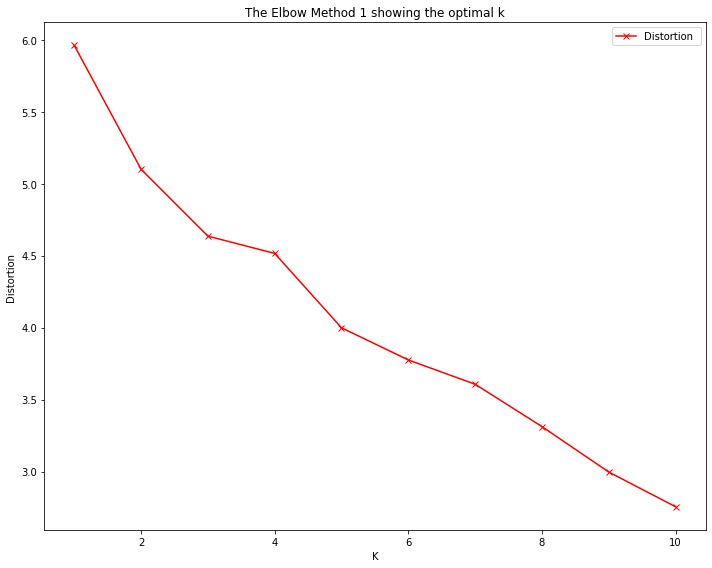

In [90]:
plt.figure(figsize=(10,8))
plt.plot(range(1,Ks),mean_acc,'rx-')
plt.legend(('Distortion ', '+/- 3xstd'))
plt.ylabel('Distortion ')
plt.xlabel('K')
plt.title('The Elbow Method 1 showing the optimal k')
plt.tight_layout()
plt.show()

Using Elbow Method 1 best K value is **inconclusive**

#### Finding the Optimum K Method #2: Elbow Method

source of this code:    
https://predictivehacks.com/k-means-elbow-method-code-for-python/#:~:text=K%2DMeans%20is%20an%20unsupervised,optimal%20for%20the%20specific%20case.

In [91]:
distortions = []
K = range(1,11)
for k in K:
    kmeans_method2 = KMeans(n_clusters=k)
    kmeans_method2.fit(seattle_grouped_clustering)
    distortions.append(kmeans_method2.inertia_)

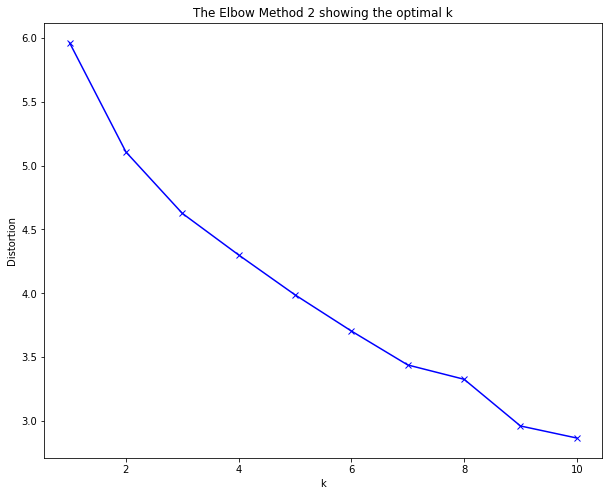

In [92]:
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method 2 showing the optimal k')
plt.show()

Using Elbow Method 2 best K value is **inconclusive**

In [93]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

#### Finding the Optimum K Method #3: Elbow Method

Source: https://pythonprogramminglanguage.com/kmeans-elbow-method/

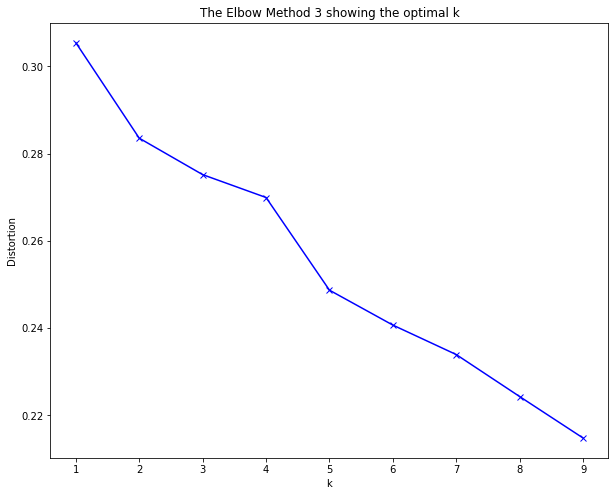

In [94]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeans_method3 = KMeans(n_clusters=k).fit(seattle_grouped_clustering)
    kmeans_method3.fit(seattle_grouped_clustering)
    distortions.append(sum(np.min(cdist(seattle_grouped_clustering, kmeans_method3.cluster_centers_, 'euclidean'), axis=1)) / seattle_grouped_clustering.shape[0])

# Plot the elbow
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method 3 showing the optimal k')
plt.show()

Using Elbow Method 3 best K value is **inconclusive**

#### Finding the Optimum K Method #4: Elbow Method

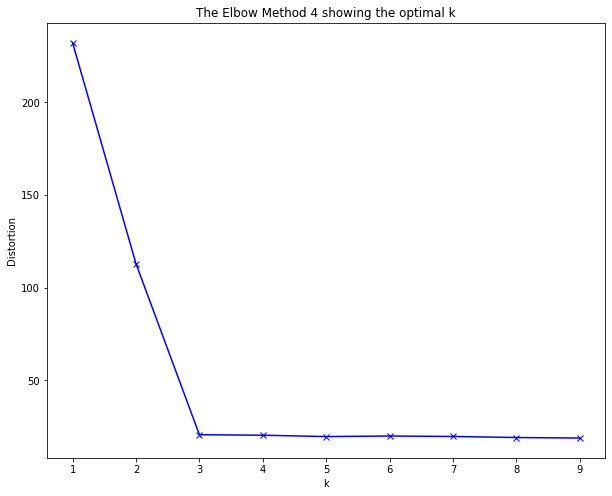

In [95]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeans_method4 = KMeans(n_clusters=k).fit(seattle_grouped_clustering)
    kmeans_method4.fit(seattle_grouped_clustering)
    distortions.append(sum(np.min(cdist(seattle_grouped_clustering, kmeans_method4.cluster_centers_, 'canberra'), axis=1)) / seattle_grouped_clustering.shape[0])

#After trying different metric distance parameters for spatial distance, canberra metric was chosen, as the elbow break point was clearly visible unlike previously.

# Plot the elbow
plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method 4 showing the optimal k')
plt.show()

Using Elbow Method 4 best K value is **3**.

#### Finding the Optimum K Method #5: The Silhouette Method

source: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

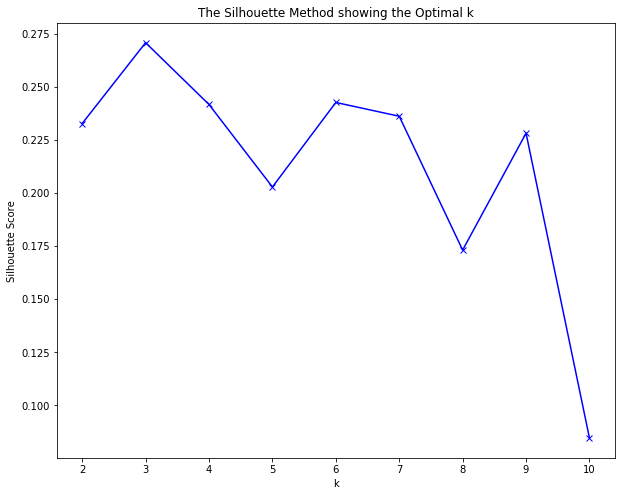

In [96]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans_method5 = KMeans(n_clusters = k).fit(seattle_grouped_clustering)
  labels = kmeans_method5.labels_
  sil.append(silhouette_score(seattle_grouped_clustering, labels, metric = 'euclidean'))#'euclidean'))

# Plot the graph
plt.figure(figsize=(10,8))
plt.plot(range(2,kmax+1), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the Optimal k')
plt.show()

Using Silhouette Score method best K value is **3**.

In [97]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans_final = KMeans(n_clusters=kclusters, random_state=0).fit(seattle_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_final.labels_[0:10] 

array([0, 2, 0, 0, 2, 2, 2, 0, 2, 2])

-----------------------------------------------------

## Results <a name="Results"></a> 

### Let's create a new dataframe that includes the cluster label as well as the 10 most common venues(venue categories) for each neighborhood.

In [98]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans_final.labels_)

In [99]:
seattle_merged = census_df[['Neighbourhood','Latitude','Longitude']]

# merge seattle_grouped dataframe with neighbourhoods_venues_sorted to add latitude/longitude for each neighborhood
seattle_merged = seattle_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood', how = 'right')

seattle_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arbor Heights,47.546653,-122.383186,2,Pizza Place,Pub,Sandwich Place,Supplement Shop,Japanese Restaurant,Storage Facility,Fried Chicken Joint,Chinese Restaurant,Gas Station,Shipping Store
2,Fauntleroy/Seaview,47.565040,-122.376154,2,Coffee Shop,BBQ Joint,Golf Course,Gym,Sports Bar,Brewery,Taco Place,Furniture / Home Store,Spa,Salon / Barbershop
3,West Seattle Junction/Genesee Hill,47.578940,-122.410670,2,Coffee Shop,Ice Cream Shop,Brewery,Seafood Restaurant,Art Gallery,Mexican Restaurant,Park,Sandwich Place,Market,Thai Restaurant
4,Alki/Admiral,47.564730,-122.363860,0,Bus Station,Park,Arts & Crafts Store,Sandwich Place,Skate Park,Soccer Field,Construction & Landscaping,Coffee Shop,Gym,Falafel Restaurant
5,North Delridge,47.547040,-122.368940,1,Park,Trail,Playground,Zoo Exhibit,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop


In [100]:
seattle_merged.shape

(53, 14)

#### Use geopy library to get the latitude and longitude values of Seattle.

In [101]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle are 47.6038321, -122.3300624.


### Visualize the resulting clusters

In [102]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(seattle_merged['Latitude'], seattle_merged['Longitude'], seattle_merged['Neighbourhood'], seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='navy',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examining Clusters

#### Cluster 0

In [103]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 0, seattle_merged.columns[[0] + list(range(3, seattle_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Alki/Admiral,0,Bus Station,Park,Arts & Crafts Store,Sandwich Place,Skate Park,Soccer Field,Construction & Landscaping,Coffee Shop,Gym,Falafel Restaurant
7,Riverview,0,Eye Doctor,Pool,Park,Soccer Field,Zoo Exhibit,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
14,Beacon Hill,0,Park,Golf Course,Pub,Playground,Mexican Restaurant,Golf Driving Range,Skate Park,Coffee Shop,Trail,Dog Run
18,Seward Park,0,Harbor / Marina,Park,Pizza Place,Pet Store,Zoo Exhibit,Eye Doctor,Food,Flower Shop,Flea Market,Fish Market
20,Madrona/Leschi,0,Park,Dance Studio,Yoga Studio,Trail,Rental Service,Bus Station,Tunnel,Skate Park,South American Restaurant,Café
30,Ravenna/Bryant,0,Art Gallery,Bus Stop,Park,Zoo Exhibit,Fabric Shop,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
40,Haller Lake,0,Park,Construction & Landscaping,Garden Center,Bus Stop,Café,Zoo Exhibit,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop
44,Ballard,0,Park,Music Store,Volleyball Court,Gas Station,Coffee Shop,Grocery Store,Bus Stop,Spa,Mexican Restaurant,Convenience Store
45,Fremont,0,Park,Seafood Restaurant,Art Gallery,Café,Boat or Ferry,Lounge,Harbor / Marina,Pizza Place,Bus Stop,Bus Line
47,Cascade/Eastlake,0,Harbor / Marina,Burger Joint,Bus Line,Sporting Goods Shop,Seafood Restaurant,Park,Zoo Exhibit,Fabric Shop,Flower Shop,Flea Market


#### Cluster 1

In [104]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 1, seattle_merged.columns[[0] + list(range(3, seattle_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,North Delridge,1,Park,Trail,Playground,Zoo Exhibit,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
6,High Point,1,Trail,Park,Baseball Field,Zoo Exhibit,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
12,Duwamish/SODO,1,Park,Grocery Store,Zoo Exhibit,Eye Doctor,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop


#### Cluster 2

In [105]:
seattle_merged.loc[seattle_merged['Cluster Labels'] == 2, seattle_merged.columns[[0] + list(range(3, seattle_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arbor Heights,2,Pizza Place,Pub,Sandwich Place,Supplement Shop,Japanese Restaurant,Storage Facility,Fried Chicken Joint,Chinese Restaurant,Gas Station,Shipping Store
2,Fauntleroy/Seaview,2,Coffee Shop,BBQ Joint,Golf Course,Gym,Sports Bar,Brewery,Taco Place,Furniture / Home Store,Spa,Salon / Barbershop
3,West Seattle Junction/Genesee Hill,2,Coffee Shop,Ice Cream Shop,Brewery,Seafood Restaurant,Art Gallery,Mexican Restaurant,Park,Sandwich Place,Market,Thai Restaurant
8,Roxhill/Westwood,2,Baseball Field,Burger Joint,Convenience Store,Café,Theater,Playground,Zoo Exhibit,Fish & Chips Shop,Fast Food Restaurant,Filipino Restaurant
9,Highland Park,2,Mexican Restaurant,Coffee Shop,Pizza Place,Grocery Store,Harbor / Marina,Bar,Bakery,Café,Brewery,Restaurant
10,South Park,2,Park,Bar,Café,Dive Bar,Brewery,Pizza Place,Dessert Shop,Lounge,Gas Station,Coffee Shop
11,Georgetown,2,Sandwich Place,Wine Bar,Coffee Shop,Fish & Chips Shop,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Zoo Exhibit
13,South Beacon Hill/NewHolly,2,Mexican Restaurant,Café,Coffee Shop,Pub,Peking Duck Restaurant,Mediterranean Restaurant,Park,Fried Chicken Joint,Scenic Lookout,Bakery
15,North Beacon Hill/Jefferson Park,2,Garden,Bus Stop,Baseball Field,Zoo Exhibit,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
16,Rainier Beach,2,Pizza Place,Coffee Shop,Bar,Ice Cream Shop,African Restaurant,Diner,Pet Store,Gastropub,Bookstore,Sushi Restaurant


#### Observations

Cluster 0 and 1: This cluster comprises of Outdoors activities venues, with Parks being the most common, followed by trails.

Cluster 2: This cluster comprises of restaurants, eatiries, casual hangout venues, with restaurants and coffee shops being the most common.

## Discussion <a name="Discussion"></a>

In order to recommend which Neighbourhood(s) is/are best to open an Ice-Cream shop/shops or ice-cream trucks as such that the area/areas is/are populous and preferably where the general population is young and outdoorsy, in the city of Seattle, Washington, USA.

Since Cluster 0 and Cluster 1 encompasses majority of neighbourhoods, with outdoors activities’ venues, such as parks, trails, playgrounds to name a few. Parks being the most common, followed by trails. Next, to satisfy the conditions of such neighbourhood(s) to be populated with population under 18 and be a populous area we therefore look at the two Dataframes that were created earlier as shown below:

In [107]:
# 10 Neighbourhoods with most Population under 18 
top10_neigh_Pop18Under

,Neighbourhood,Population Under 18,Latitude,Longitude
30,Ravenna/Bryant,4227,47.68033,-122.27290
13,South Beacon Hill/NewHolly,3892,47.57686,-122.31271
38,Greenwood/Phinney Ridge,3870,47.68508,-122.33232
17,Columbia City,3692,47.55115,-122.26680
50,Queen Anne,3623,47.61576,-122.34464
16,Rainier Beach,3389,47.55687,-122.28452
3,West Seattle Junction/Genesee Hill,3202,47.57894,-122.41067
31,Wedgwood/View Ridge,3179,47.66398,-122.27582
48,Magnolia,2655,47.65399,-122.37969
32,Laurelhurst/Sand Point,2645,47.70013,-122.31765


In [108]:
# 10 most populous Neighbourhoods 
Most_Pop_neigh

,Neighbourhood,Total Population,Latitude,Longitude
50,Queen Anne,35458,47.61576,-122.34464
30,Ravenna/Bryant,24187,47.68033,-122.27290
38,Greenwood/Phinney Ridge,23948,47.68508,-122.33232
24,Capitol Hill,19078,47.62396,-122.31882
29,University District,19051,47.67393,-122.29914
3,West Seattle Junction/Genesee Hill,17713,47.57894,-122.41067
22,Central Area/Squire Park,16969,47.60878,-122.32643
17,Columbia City,16883,47.55115,-122.26680
46,Wallingford,16014,47.64708,-122.32477
45,Fremont,15626,47.65555,-122.32650


Analyzing the neighbourhoods found in Cluster 0, Cluster 1 and in the two Dataframes shown above. Out of the 13 neighbourhoods found in Cluster 0 and Cluster 1 as shown below, only one neighbourhood called “Ravenna/Bryant” was found in the most populous neighbourhood dataframe and most population under 18 neighbourhoods DataFrame. 
* <s>Alki/Admiral<s>
* <s>Riverview<s>
* <s>Beacon Hill<s>
* <s>Seward Park<s>
* <s>Madrona/Leschi<s>
* Ravenna/Bryant (Found in Both)
* <s>Haller Lake<s>
* <s>Ballard<s>
* Fremont (Found in Populous DataFrame)
* <s>Cascade/Easlake<s>
* <s>North Delridge<s>
* <s>High Point<s>
* <s>Duwamish/SODO<s>

Therefore, it is recommended to open an Ice-Cream shop/shops or ice-cream trucks in Ravenna/Bryant neighbourhood, in the city of Seattle, Washington, USA.


In [110]:
cluster_0 = census_df.loc[[4,5,6,7,12,18,30,40,45],["Neighbourhood","Latitude","Longitude"]]

In [111]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(cluster_0['Latitude'], cluster_0['Longitude'], cluster_0['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='indigo',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

--------------------------------------------------

## Conclusion <a name="Conclusion"></a>

Although Ravenna/Bryant neighbourhood was chosen as a suitable place to open an Ice-Cream shop/shops or ice-cream truck(s), other neighburhoods found in Cluster 0 and Cluster 1 could also be a good candidate given further investigation is carried out. Other business stakeholders, could explore the neighbourhoods found in Cluster 0 and Cluster 1 to see the viability of opening a business which also cater to an outdoorsy population. Potential businesses in this cluster could include, smoothie shop/truck, snack shop/truck etc.

Following Dataframes shown below were not utilized but could be used for future research for other types of business:
* Race/Ethnicity DataFrame
* Housing DataFrame
* Populous Neighbourhoods Dataframe
